**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( J )

---

Engenheiro(a) do conhecimento:
* Arthur Cavalcante de Andrade
* William Teixeira Pires Junior

---

# Solução para o Problema

In [13]:
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn import tree
from six import StringIO
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
import seaborn
import pandas

### Separação de Parâmetros

Utilizamos como base de dados a tabela resultante da análise exploratória, dividindo-a nas seguintes tabelas:

* `*_fraud`: Apresenta todas as informações a serem analisadas sobre as operações em que **ocorreram** fraudes.
* `*_non_fraud`: Apresenta todas as informações a serem analisadas sobre as operações em que **não ocorreram** fraudes.

Ambas foram divididas em `x` e `y`, onde `y` é a tabela que possui somente o atributo-alvo `isFraud` de cada operação, para uma criação facilitada da árvore.

In [14]:
data = pandas.read_csv('reduced_data.csv')
feature_labels = ['hasMerchantAccount', 'simplified_type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Entradas com fraude
fraud_transactions = data.loc[data['isFraud'] == 1]
x_fraud = fraud_transactions[feature_labels]
y_fraud = fraud_transactions['isFraud']

# Entradas sem fraude
non_fraud_transactions = data.loc[data['isFraud'] == 0]
x_non_fraud = non_fraud_transactions[feature_labels]
y_non_fraud = non_fraud_transactions['isFraud']

In [15]:
print("Número de entradas com fraude: ", len(x_fraud))
print("Número de entradas sem fraude: ", len(x_non_fraud))

Número de entradas com fraude:  8213
Número de entradas sem fraude:  6354407


### Espaço de Treinamento e Espaço de Testes

Para o espaço de treinamento, decidimos atribuir de forma proporcinal a quantidade de fraudes e não fraudes.

Desta forma, permitimos que a árvore identifique as diferentes casos possíveis para ambos os resultados.

Reduzimos o espaço de amostras nas tabelas `*_train` para realizar o treinamento da árvore, e `*_test`, para receber o resto do espaço como casos de testes:

In [16]:
# Utilizando 8000 casos (4000 fraudes e 4000 não fraudes)

x_train = pandas.concat([x_fraud[:4000], x_non_fraud[:4000]])
y_train = pandas.concat([y_fraud[:4000], y_non_fraud[:4000]])

# Separando os casos não utilizados no treinamento para realização de testes
x_fraud_test = x_fraud[4000:]
y_fraud_test = y_fraud[4000:]

x_non_fraud_test = x_non_fraud[4000:]
y_non_fraud_test = y_non_fraud[4000:]

### Criação da Árvore de Decisão

Para a criação da árvore usaremos a biblioteca `scikit-learn`, que implementa uma versão otimizada do algoritmo **CART**, similar ao **C4.5** porém permitindo o uso de variáveis alvo numéricas. **CART** constrói uma árvore de decisão criando subdivisões nos atributos e valores que oferecem um maior ganho de informação (**entropia**) para cada nó. Mais informações sobre formulação do algoritmo implementado no `scikit-learn` pode ser vista em [Mathematical formulation](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation).

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(x_train, y_train)

Avaliando a acurácia da árvore de decisão criada:

In [18]:
y_fraud_prediction     = clf.predict(x_fraud_test)
y_non_fraud_prediction = clf.predict(x_non_fraud_test)
y_train_prediction     = clf.predict(x_train)
y_complete_prediction  = clf.predict(data[feature_labels])

print('Acurácia para casos de teste com fraude: ', metrics.accuracy_score(y_fraud_test, y_fraud_prediction))
print('Acurácia para casos de teste sem fraude: ', metrics.accuracy_score(y_non_fraud_test, y_non_fraud_prediction))
print('     Acurácia para casos de treinamento: ', metrics.accuracy_score(y_train, y_train_prediction))
print('           Acurácia para todos os casos: ', metrics.accuracy_score(data['isFraud'], y_complete_prediction))

Acurácia para casos de teste com fraude:  1.0
Acurácia para casos de teste sem fraude:  0.8027756331208378
     Acurácia para casos de treinamento:  0.97375
           Acurácia para todos os casos:  0.803121198499989


Apesar de obtermos uma boa precisão para os casos de teste com fraude, temos uma acurácia geral de 80.31%, enquanto a acurácia nos casos usados para o treinamento é de 97.37%, representando um **sobreajuste** aos dados de entrada.

Imprimimos a árvore de decisão gerada abaixo:

<code style="background:darkred;color:white">O graphviz usado para desenhar as árvores pode não funcionar sem instalações mais complicadas, por essa razão enviamos junto as imagens geradas e iremos mostra-las usando display.Image()</code>

In [34]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=feature_labels, class_names=['not_fraud', 'fraud'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

True

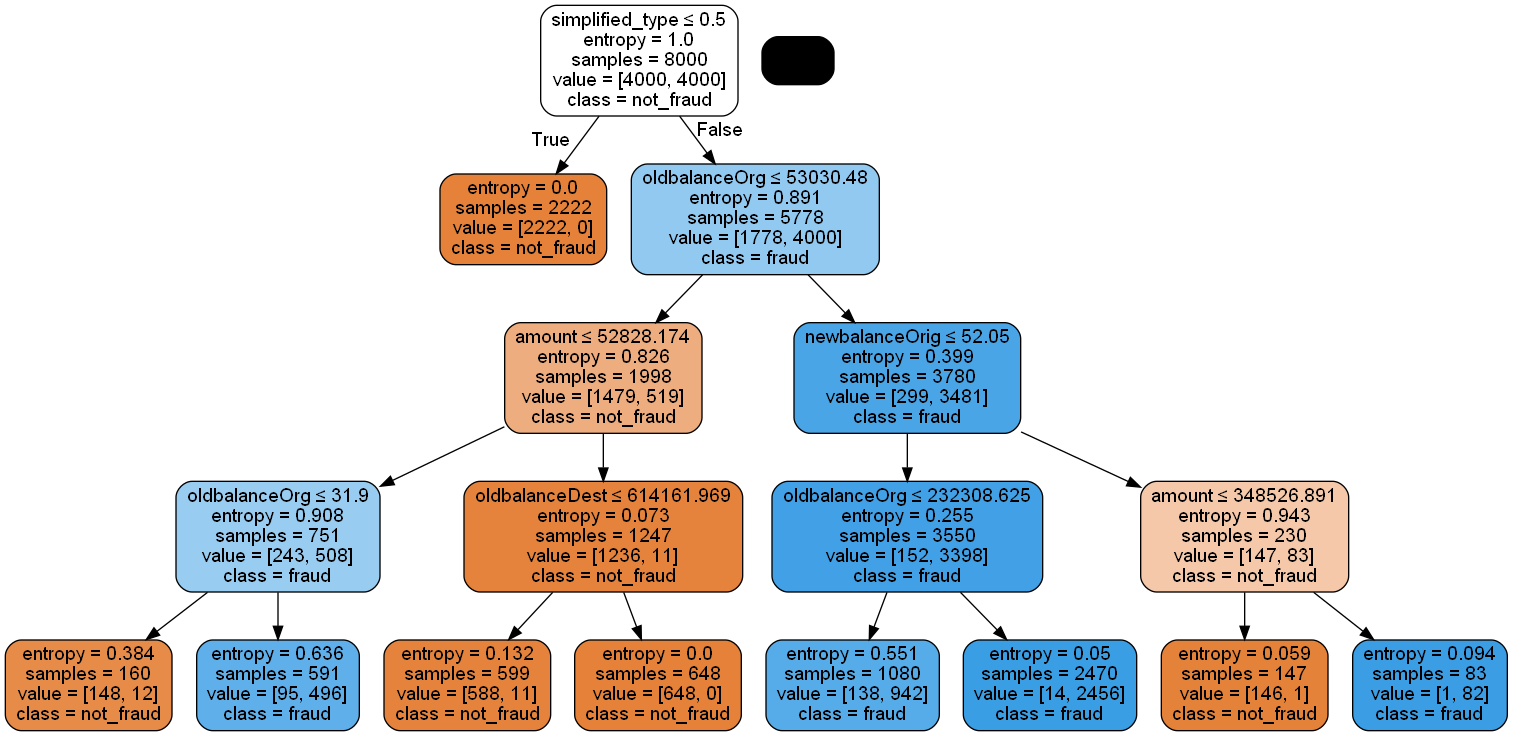

In [35]:
Image(filename='tree.png')

Podemos ver que logo de inicio, a coluna `simplified_type` é usado para separar os tipos de transação em que não ocorrem fraude, e nossa simplificação permite que isso seja feito em uma única divisão. 

Iremos agora fazer um teste, construindo a árvore de decisão a partir de dados selecionados de forma randômica.

In [43]:
# Embaralhando as linhas na base de dados
x_fraud_rand = x_fraud.sample(frac=1)
y_fraud_rand = y_fraud.sample(frac=1)
x_non_fraud_rand = x_non_fraud.sample(frac=1)
y_non_fraud_rand = y_non_fraud.sample(frac=1)

# Utilizando 8000 casos (4000 fraudes e 4000 não fraudes)
x_train = pandas.concat([x_fraud_rand[:4000], x_non_fraud_rand[:4000]])
y_train = pandas.concat([y_fraud_rand[:4000], y_non_fraud_rand[:4000]])

# Separando os casos não utilizados no treinamento para realização de testes
x_fraud_test = x_fraud_rand[4000:]
y_fraud_test = y_fraud_rand[4000:]

x_non_fraud_test = x_non_fraud_rand[4000:]
y_non_fraud_test = y_non_fraud_rand[4000:]

In [44]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(x_train, y_train)

In [45]:
y_fraud_prediction     = clf.predict(x_fraud_test)
y_non_fraud_prediction = clf.predict(x_non_fraud_test)
y_train_prediction     = clf.predict(x_train)
y_complete_prediction  = clf.predict(data[feature_labels])

print('Acurácia para casos de teste com fraude: ', metrics.accuracy_score(y_fraud_test, y_fraud_prediction))
print('Acurácia para casos de teste sem fraude: ', metrics.accuracy_score(y_non_fraud_test, y_non_fraud_prediction))
print('     Acurácia para casos de treinamento: ', metrics.accuracy_score(y_train, y_train_prediction))
print('           Acurácia para todos os casos: ', metrics.accuracy_score(data['isFraud'], y_complete_prediction))

Acurácia para casos de teste com fraude:  0.9931165440303822
Acurácia para casos de teste sem fraude:  0.9238461408851433
     Acurácia para casos de treinamento:  0.9605
           Acurácia para todos os casos:  0.9239380946842652


In [46]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=feature_labels, class_names=['not_fraud', 'fraud'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_random.png')

True

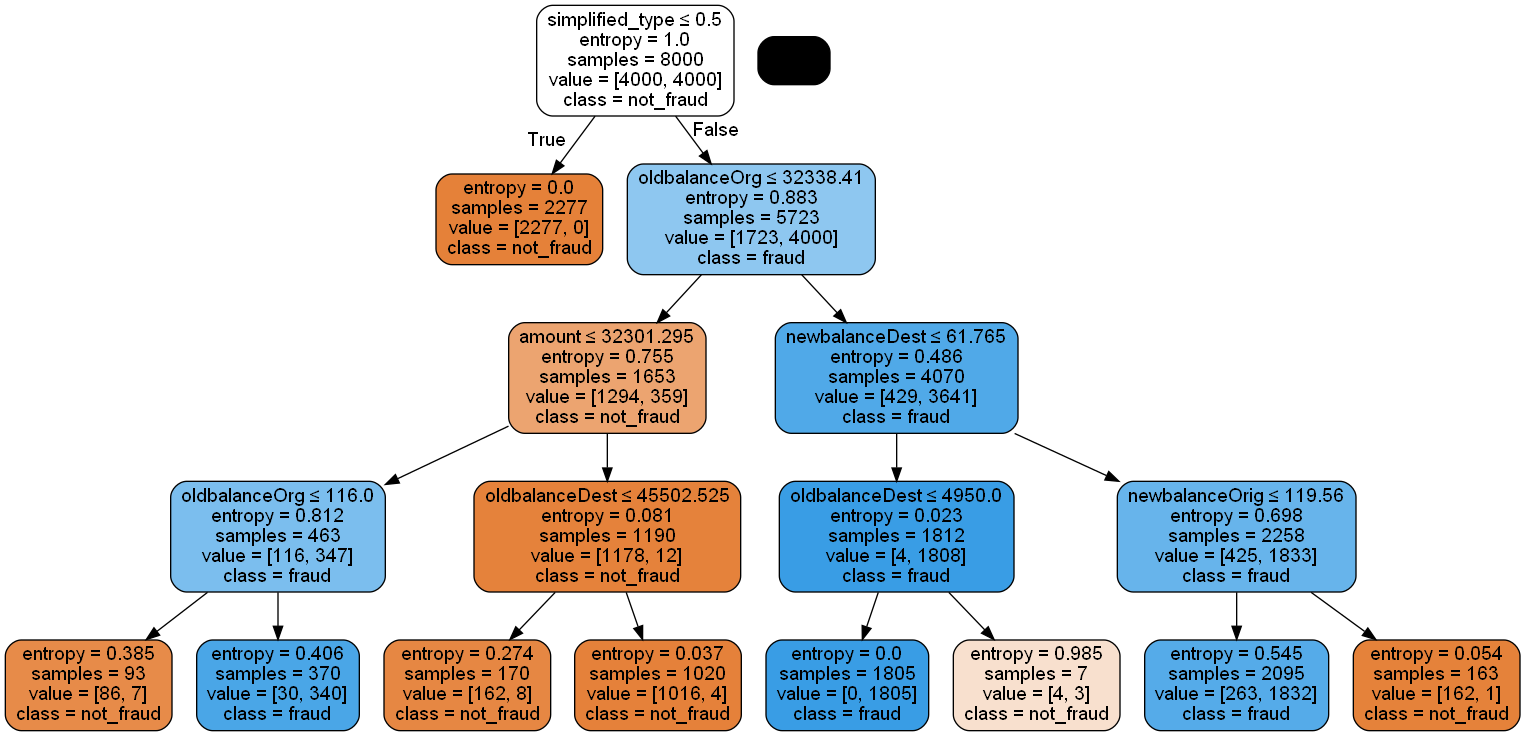

In [47]:
Image(filename='tree_random.png')

Usando dados embaralhados obtivemos uma maior acurácia para a correta detecção de **não fraudes**, olhando a árvore obtida, podemos supor que isso acontece devido uma maior quantidade de transações não fraudulentas, porém dos tipos que podem ocorrer fraude, estarem presentes no conjunto de treinamento.

### Avaliando Diferentes Resultados

A partir destes resultados, podemos avaliar as diferentes precisões resultantes com mudanças de parâmetros, como `*_train` e `max_deph`.

Dessa forma, criamos um código para apresentar resultados de acurácia a variação de quantidade de entradas com exemplos não fradulentos (`*_non_fraud`) para o treino da árvore de decisão, juntamente da variação de profundidade limite da árvore (`max_depth`).

Decidimos não alterar os parâmetros de `*_fraud` pois a mudança de `*_non_fraud` já garante que as proporções de entradas de treino sejam alteradas de forma linear.

O intervalo de `*_non_fraud` foi definido de 4000 a 20000 com passo 2000, e o intervalo de `max_depth` foi definido de 3 a 18, com passo 1.

In [19]:
# Utilizando 4000+size casos, sendo 4000 fraudes e size não fraudes

fraud_accuracy = []
non_fraud_accuracy = []
train_accuracy = []
complete_accuracy = []
for size in range(4000, 22000, 2000):
    x_train = pandas.concat([x_fraud[:4000], x_non_fraud[:size]])
    y_train = pandas.concat([y_fraud[:4000], y_non_fraud[:size]])

    # Separando os casos não utilizados no treinamento para realização de testes
    x_fraud_test = x_fraud[4000:]
    y_fraud_test = y_fraud[4000:]
    x_non_fraud_test = x_non_fraud[size:]
    y_non_fraud_test = y_non_fraud[size:]
    
    fraud_accuracy_depth = []
    non_fraud_accuracy_depth = []
    train_accuracy_depth = []
    complete_accuracy_depth = []
    for depth in range(3, 19, 1):
        clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        clf = clf.fit(x_train, y_train)

        y_fraud_prediction     = clf.predict(x_fraud_test)
        y_non_fraud_prediction = clf.predict(x_non_fraud_test)
        y_train_prediction     = clf.predict(x_train)
        y_complete_prediction  = clf.predict(data[feature_labels])
        
        fraud_accuracy_depth.append(metrics.accuracy_score(y_fraud_test, y_fraud_prediction))
        non_fraud_accuracy_depth.append(metrics.accuracy_score(y_non_fraud_test, y_non_fraud_prediction))
        train_accuracy_depth.append(metrics.accuracy_score(y_train, y_train_prediction))
        complete_accuracy_depth.append(metrics.accuracy_score(data['isFraud'], y_complete_prediction))
    
    fraud_accuracy.append(fraud_accuracy_depth)
    non_fraud_accuracy.append(non_fraud_accuracy_depth)
    train_accuracy.append(train_accuracy_depth)
    complete_accuracy.append(complete_accuracy_depth)

Após receber os resultados, para uma melhor análise, apresentamos as comparações de saídas utilizando heatmaps:

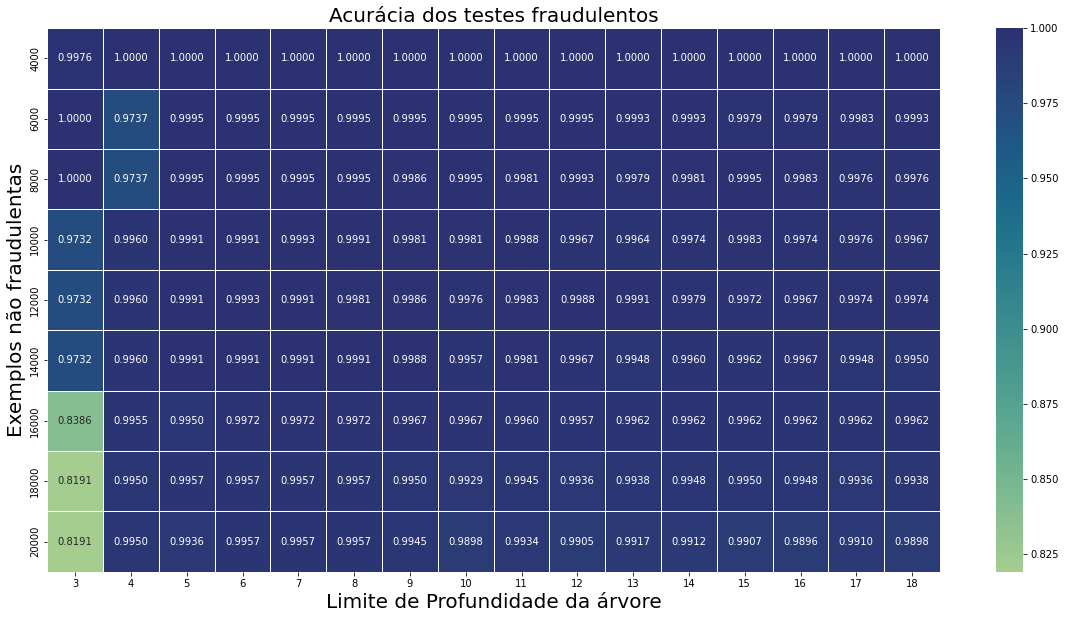

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(fraud_accuracy, annot=True, fmt=".4f", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Exemplos não fraudulentas', fontsize=20)
ax.set_xlabel('Limite de Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia dos testes fraudulentos', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_fraudulentos_acuracia.jpg')

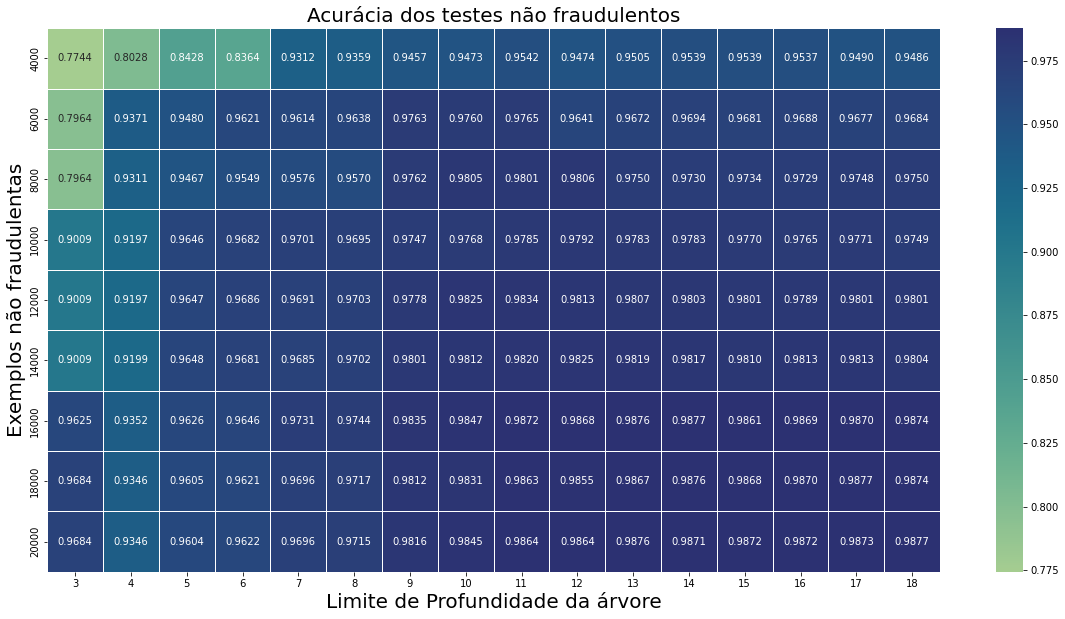

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(non_fraud_accuracy, annot=True, fmt=".4f", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Exemplos não fraudulentas', fontsize=20)
ax.set_xlabel('Limite de Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia dos testes não fraudulentos', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_nao_fraudulentos_acuracia.jpg')

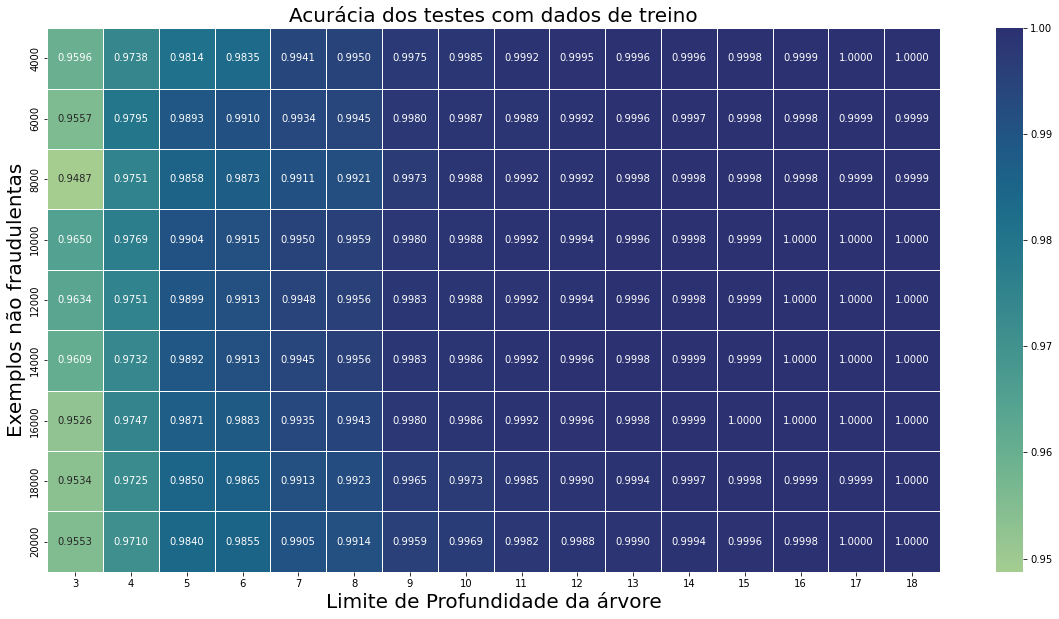

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(train_accuracy, annot=True, fmt=".4f", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Exemplos não fraudulentas', fontsize=20)
ax.set_xlabel('Limite de Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia dos testes com dados de treino', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_treino_acuracia.jpg')

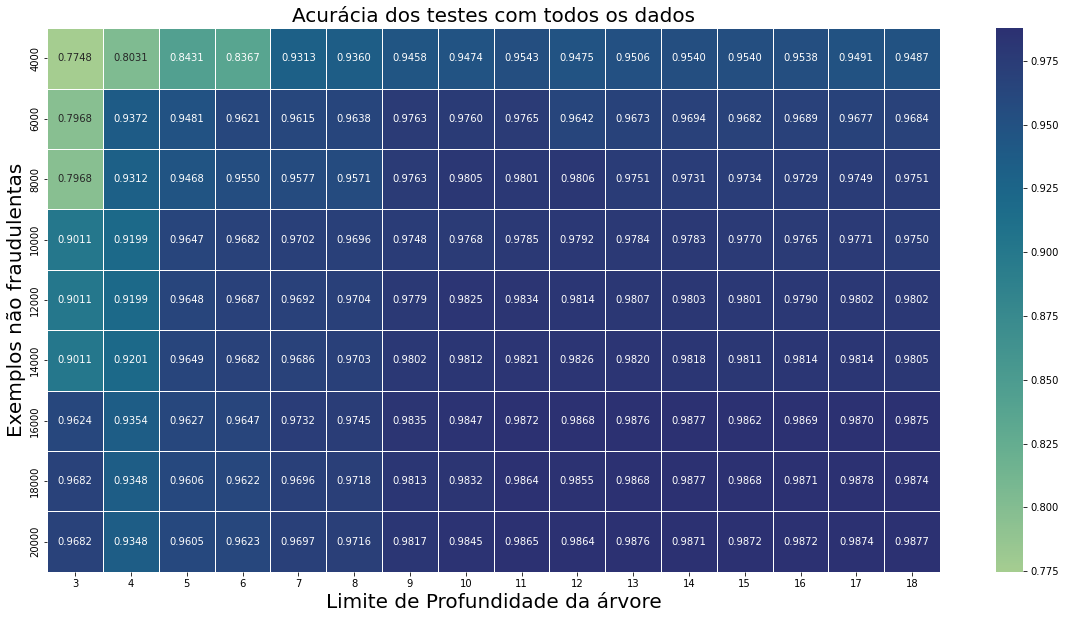

In [48]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(complete_accuracy, annot=True, fmt=".4f", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Exemplos não fraudulentas', fontsize=20)
ax.set_xlabel('Limite de Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia dos testes com todos os dados', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_completo_acuracia.jpg')

A partir destes resultados, podemos fazer as seguintes afirmações sobre a acurácia da solução:

1. Quanto mais exemplos de transações não fraudulentas nos dados de treinamento, menor a acurácia na detecção de fraudes;

2. Quanto mais exemplos de transações não fraudulentas nos dados de treinamento, maior a acurácia na detecção de não fraudes;

3. Quanto mais restritivo o limite na altura da árvore, mais **subajuste** obtemos com relação aos dados de treino.

4. Os testes de acurácia são dominados pelas entradas não fraudulentas, então os resultados de **testes com dados sem fraude** e **testes com todos os dados** são bastante semelhantes.

Fazendo o mesmo teste, porém com os dados selecionados de forma randômica:

In [49]:
# Utilizando 4000+size casos, sendo 4000 fraudes e size não fraudes

fraud_accuracy = []
non_fraud_accuracy = []
train_accuracy = []
complete_accuracy = []
for size in range(4000, 22000, 2000):
    x_train = pandas.concat([x_fraud_rand[:4000], x_non_fraud_rand[:size]])
    y_train = pandas.concat([y_fraud_rand[:4000], y_non_fraud_rand[:size]])
    
    # Separando os casos não utilizados no treinamento para realização de testes
    x_fraud_test = x_fraud_rand[4000:]
    y_fraud_test = y_fraud_rand[4000:]
    x_non_fraud_test = x_non_fraud_rand[4000:]
    y_non_fraud_test = y_non_fraud_rand[4000:]

    fraud_accuracy_depth = []
    non_fraud_accuracy_depth = []
    train_accuracy_depth = []
    complete_accuracy_depth = []
    for depth in range(3, 19, 1):
        clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        clf = clf.fit(x_train, y_train)

        y_fraud_prediction     = clf.predict(x_fraud_test)
        y_non_fraud_prediction = clf.predict(x_non_fraud_test)
        y_train_prediction     = clf.predict(x_train)
        y_complete_prediction  = clf.predict(data[feature_labels])
        
        fraud_accuracy_depth.append(metrics.accuracy_score(y_fraud_test, y_fraud_prediction))
        non_fraud_accuracy_depth.append(metrics.accuracy_score(y_non_fraud_test, y_non_fraud_prediction))
        train_accuracy_depth.append(metrics.accuracy_score(y_train, y_train_prediction))
        complete_accuracy_depth.append(metrics.accuracy_score(data['isFraud'], y_complete_prediction))
    
    fraud_accuracy.append(fraud_accuracy_depth)
    non_fraud_accuracy.append(non_fraud_accuracy_depth)
    train_accuracy.append(train_accuracy_depth)
    complete_accuracy.append(complete_accuracy_depth)

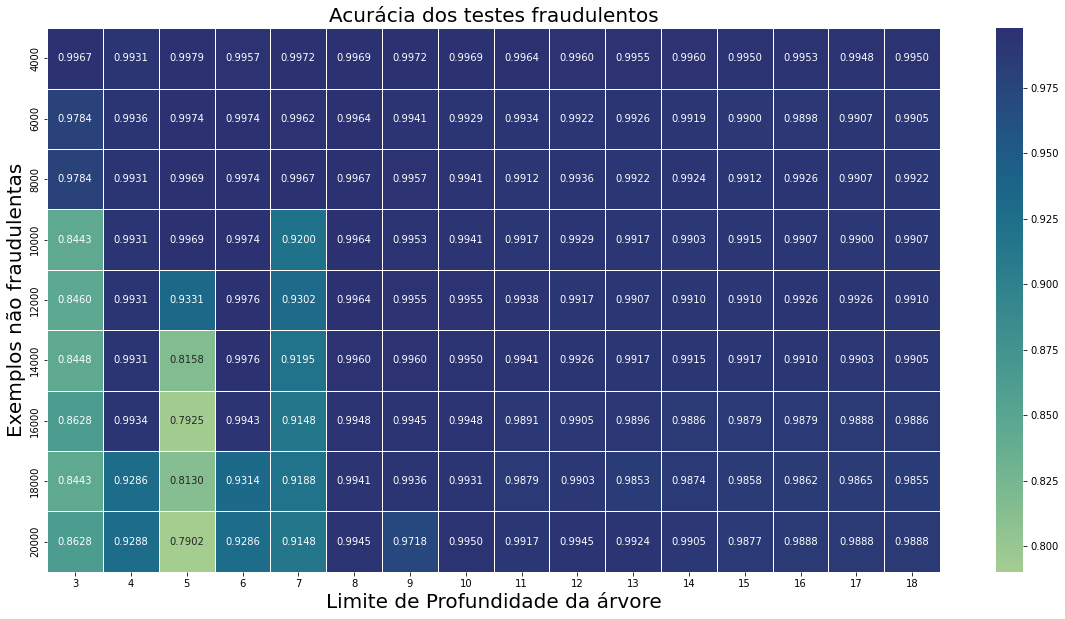

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(fraud_accuracy, annot=True, fmt=".4f", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Exemplos não fraudulentas', fontsize=20)
ax.set_xlabel('Limite de Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia dos testes fraudulentos', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_fraudulentos_acuracia_rand.jpg')

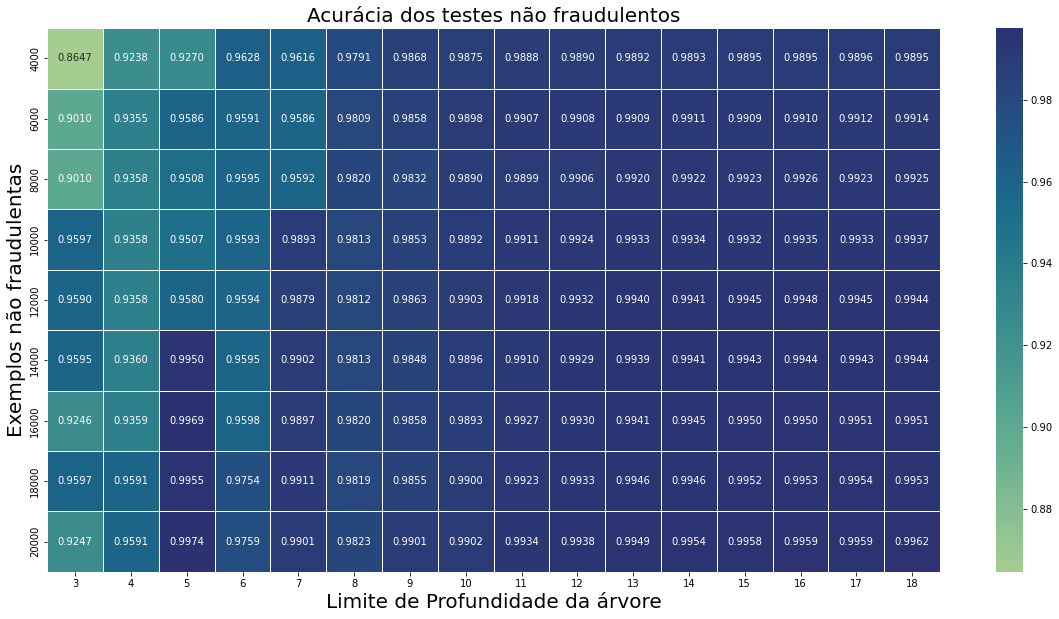

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(non_fraud_accuracy, annot=True, fmt=".4f", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Exemplos não fraudulentas', fontsize=20)
ax.set_xlabel('Limite de Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia dos testes não fraudulentos', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_nao_fraudulentos_acuracia_rand.jpg')

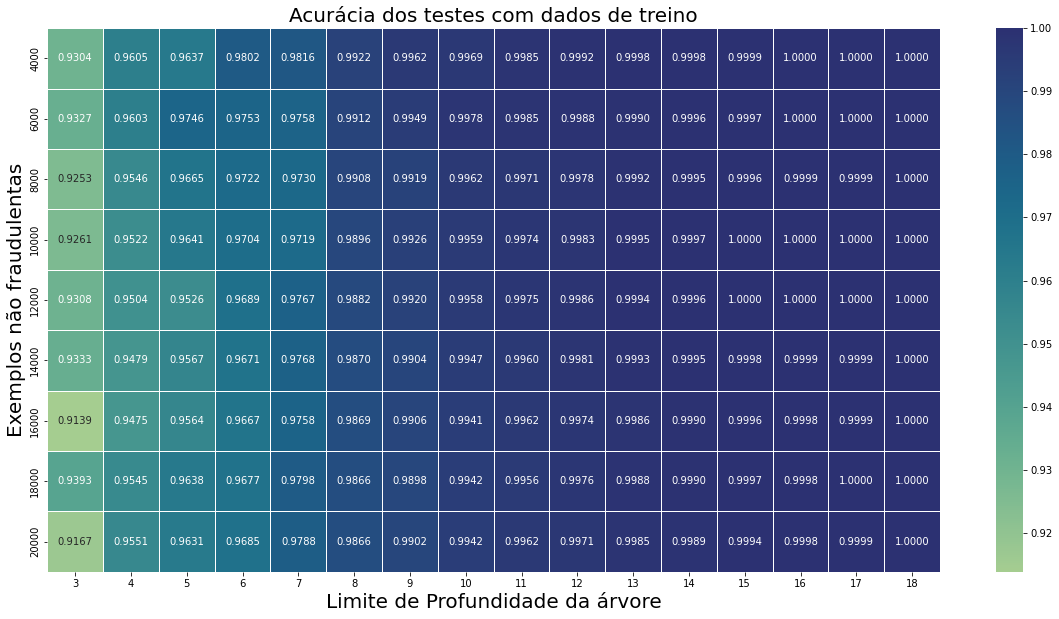

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(train_accuracy, annot=True, fmt=".4f", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Exemplos não fraudulentas', fontsize=20)
ax.set_xlabel('Limite de Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia dos testes com dados de treino', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_treino_acuracia_rand.jpg')

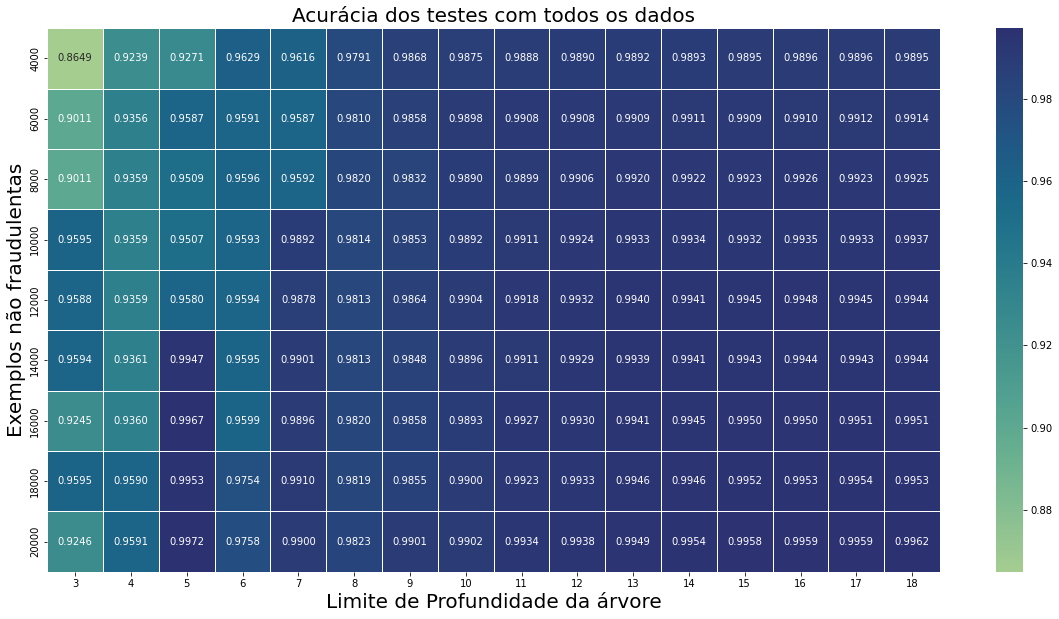

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(complete_accuracy, annot=True, fmt=".4f", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Exemplos não fraudulentas', fontsize=20)
ax.set_xlabel('Limite de Profundidade da árvore', fontsize=20)
ax.set_title('Acurácia dos testes com todos os dados', fontsize=20)
ax.set_yticklabels(range(4000,22000,2000))
ax.set_xticklabels(range(3, 19,1))
fig.savefig('testes_completo_acuracia_rand.jpg')

além de obtermos melhores acurácias no geral, as observações feitas anteriormente são acentuadas.